# Clean reindexation files from ABES - April 2023

# Set project

### Packages

In [1]:
# Import librairies
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from utils_metrics import *
from utils_visualization import *

2023-06-29 14:44:31.599228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package words to /home/aurelie/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aurelie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/aurelie/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Suppression des FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### Graphical parameters

In [3]:
# Parametres graphiques
%matplotlib inline
rcParams = {
    'font.size': 14,
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.max_open_warning': 30}

sns.set(rc=rcParams)
sns.set_style(
    "whitegrid", {
        'axes.edgecolor': 'k',
        'axes.linewidth': 1,
        'axes.grid': True,
        'xtick.major.width': 1,
        'ytick.major.width': 1
        })

sns.set_context(
    "notebook",
    font_scale=1.1,
    rc={"lines.linewidth": 1.5})

pd.set_option('display.max_columns', None)

### Paths

In [4]:
# Set paths
path = "."
os.chdir(path)
data_path = path + "/data"
output_path = path + "/outputs"
fig_path = path + "/figs"

In [5]:
# Include embeddings
include_embedding = False

# Import data

In [6]:
# Original dataset
rameau_file = "rameau_Tf_Td.csv"
sudoc = "working_data_sans_dewey.pkl"
if include_embedding:
    reindex_file = "data_with_reindexation_and_embeddings.csv"
else:
    reindex_file = "reindexation_final_juin2023.csv"

In [7]:
#Import data
reindex = pd.read_csv(os.path.join(data_path, reindex_file), index_col=0)
print(reindex.shape)

(100, 16)


In [8]:
# Import SUDOC
sudoc_file = pd.read_pickle(os.path.join(data_path, sudoc))
sudoc_file.head(3)

PPN                                              TITRE   
0  000002364                              La culture pour vivre  \
1  000014877  La nuit, le jour : essai psychanalytique sur l...   
2  000021857                                 Ruptures, cultures   

                                              RESUME   
0  Mort de la culture populaire en France. Mutati...  \
1  Discontinuité, latence, rétablissement d’une c...   
2  Il faut imaginer Robinson sur son île, au mome...   

                                              RAMEAU   DEWEY   
0  Culture populaire;Diffusion de la culture;Poli...     840  \
1          Complexe de castration;Psychanalyse;Rêves  154.63   
2                                            Culture     840   

                                               DESCR   
0  La culture pour vivre Mort de la culture popul...  \
1  La nuit, le jour : essai psychanalytique sur l...   
2  Ruptures, cultures Il faut imaginer Robinson s...   

                                      RAMEAU_CHECKED   
0  Culture populaire;Diffusion de la culture;Poli...  \
1          Complexe de castration;Psychanalyse;Rêves   
2                                            Culture   

   presence_chaine_indexation   
0                       False  \
1                       False   
2                       False   

                                rameau_chaines_index   
0  [Culture populaire, Diffusion de la culture, P...  \
1      [Complexe de castration, Psychanalyse, Rêves]   
2                                          [Culture]   

                                     rameau_concepts  
0  [Culture populaire, Diffusion de la culture, P...  
1      [Complexe de castration, Psychanalyse, Rêves]  
2                                          [Culture]

In [9]:
# Import rameau list
ram = pd.read_csv(os.path.join(data_path, rameau_file), index_col=0)
print("Nombre de notices différentes: ", ram.shape[0])
ram.head(5)

Nombre de notices différentes:  103628


PPN                   NOM                             URI
0  157992527                Kirp?n  https://www.idref.fr/157992527
1  110140494   Militaires artistes  https://www.idref.fr/110140494
2  028492161    Militaires romains  https://www.idref.fr/028492161
3  028521757  Militaires prussiens  https://www.idref.fr/028521757
4  029895561            Sa-skya-pa  https://www.idref.fr/029895561

## Merge SUDOC and reindexation files

In [10]:
df = reindex.merge(sudoc_file[["PPN", "RAMEAU_CHECKED", "rameau_chaines_index", "rameau_concepts"]], on="PPN", how="inner")
print(df.shape)
df.head(3)

(100, 19)


N°ordre        PPN                                              TITRE   
0       79  000308838  Les sommets de l'État : essai sur l'élite du p...  \
1       58  003632806  Les intellectuels sous la Ve République : 1958...   
2       59  047450037                                Bouddha, bouddhisme   

                                              RESUME   
0  u XIXe siècle à nos jours, l'Etat "fort" à la ...  \
1  Célèbres, influents, on les voit, on en parle ...   
2  La 4e de couv. indique : "Ce petit livre répon...   

                                       INDEX_UNI_AFE   
0  606$3027223345$aClasses dirigeantes$3027226794...  \
1  606$3027235149$aIntellectuels$3027284948$yFran...   
2                         606$3027321835$aBouddhisme   

                                           INDEX_AFE   
0  Classes dirigeantes -- France -- Histoire;;Pou...  \
1  Intellectuels -- France -- 1958-.... (5e Répub...   
2                                         Bouddhisme   

                                       INDEX_UNI_MCR   
0  606 $3027365581$aPouvoir (sciences sociales)$3...  \
1  606 $3027235149$aIntellectuels$3027226794$yFra...   
2                        606 $3027321835$aBouddhisme   

                                           INDEX_MCR   
0  Pouvoir (sciences sociales) -- Classes dirigea...  \
1                    Intellectuels -- France -- 1945   
2                                         Bouddhisme   

                                       INDEX_UNI_JMF   
0  606$3027223345$aClasses dirigeantes$302779430X...  \
1  606$3028696980$aIntellectuels français$3049647...   
2  606$3027431215$aPhilosophie bouddhique \n606$3...   

                                           INDEX_JMF   
0  Classes dirigeantes -- Relations avec l'État -...  \
1  Intellectuels français -- Sociologie ;;Intelle...   
2   Philosophie bouddhique ;;Spiritualité bouddhique   

                                       INDEX_UNI_LPL   
0  606$3027322610$aHauts-fonctionnairesss$3027226...  \
1  606$027235149$aIntellectuels$3027284948$yFranc...   
2  606$3027321835$aBouddhisme$3027789853$xEtude e...   

                                           INDEX_LPL   
0  Hauts-fonctionnairesss -- France;;Classes diri...  \
1  Intellectuels -- France -- 1958 (5e République...   
2  Bouddhisme -- Étude et enseignement;;Philosoph...   

                                       INDEX_UNI_LJZ   
0  606$3027223345$aClasses dirigeantes$3027226794...  \
1  606$3027235149$aIntellectuels$3027226794$yFran...   
2  606$3027321835$aBouddhisme$3030974208$xCoutume...   

                                           INDEX_LJZ   
0  Classes dirigeantes -- France;;Hauts-fonctionn...  \
1  Intellectuels -- France;;Vie intellectuelle --...   
2  Bouddhisme -- Coutumes et pratiques;;Bouddhism...   

                                       INDEX_UNI_MPD   
0  606$3027223345$aClasses dirigeantes$3027226794...  \
1  606 ##‎$3027235149Intellectuels‎$3027284948$yF...   
2                         606$3027321835$aBouddhisme   

                                           INDEX_MPD   
0  Classes dirigeantes -- France -- Histoire;;Éli...  \
1  Intellectuels -- France -- 1958-.... (5e Répub...   
2                                         Bouddhisme   

                                      RAMEAU_CHECKED   
0  Bureaucratie;Classes dirigeantes;Classes dirig...  \
1               Intellectuels;Intellectuels français   
2                                         Bouddhisme   

                                rameau_chaines_index   
0  [Bureaucratie, Classes dirigeantes, Classes di...  \
1            [Intellectuels, Intellectuels français]   
2                                       [Bouddhisme]   

                                     rameau_concepts  
0  [Bureaucratie, Classes dirigeantes, Classes di...  
1            [Intellectuels, Intellectuels français]  
2                                       [Bouddhisme]

# Analyse RAMEAU concepts

In [11]:
index_columns = [
    'INDEX_AFE', 'INDEX_MCR', 'INDEX_JMF',
    'INDEX_LPL', 'INDEX_LJZ','INDEX_MPD'
]

## Number of Indexation chains

In [12]:
df["nb_chaine_index_rameau"] = df["RAMEAU_CHECKED"].apply(lambda x: 0 if isinstance(x,float) else len(x.split(";")))
if include_embedding:
    df["nb_chaine_index_embeddings"] = df["embedding_chains"].apply(lambda x: 0 if isinstance(x,float) else len(x.split(";")))
for col in index_columns:
    print("Dealing with ", col)
    index_name = col.split("_")[1]
    new_col_name = str("nb_chaine_index_" + index_name)
    df[new_col_name] = df[col].apply(lambda x: 0 if isinstance(x,float) else len(x.split(";;")))

Dealing with  INDEX_AFE
Dealing with  INDEX_MCR
Dealing with  INDEX_JMF
Dealing with  INDEX_LPL
Dealing with  INDEX_LJZ
Dealing with  INDEX_MPD


In [13]:
# Count nb of chain
if include_embedding:
    cols = [
        "nb_chaine_index_rameau",
        "nb_chaine_index_embeddings",
        "nb_chaine_index_AFE",
        "nb_chaine_index_MCR",
        "nb_chaine_index_JMF",
        "nb_chaine_index_LPL",
        "nb_chaine_index_LJZ",
        "nb_chaine_index_MPD"]
else: 
        cols = [
        "nb_chaine_index_rameau",
        "nb_chaine_index_AFE",
        "nb_chaine_index_MCR",
        "nb_chaine_index_JMF",
        "nb_chaine_index_LPL",
        "nb_chaine_index_LJZ",
        "nb_chaine_index_MPD"]

In [14]:
subset = df[cols].melt()
subset

variable  value
0    nb_chaine_index_rameau      7
1    nb_chaine_index_rameau      2
2    nb_chaine_index_rameau      1
3    nb_chaine_index_rameau      7
4    nb_chaine_index_rameau      2
..                      ...    ...
695     nb_chaine_index_MPD      2
696     nb_chaine_index_MPD      3
697     nb_chaine_index_MPD      3
698     nb_chaine_index_MPD      3
699     nb_chaine_index_MPD      3

[700 rows x 2 columns]

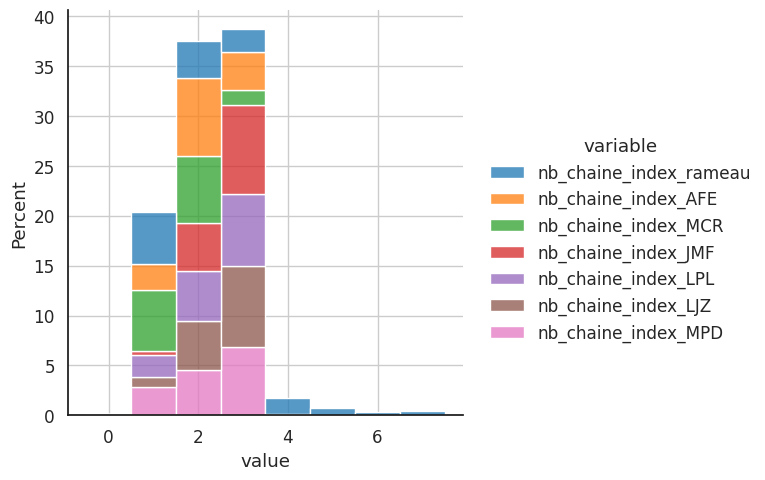

In [15]:
# Number of indexation chain
sns.displot(x="value", hue="variable", data=subset, palette="tab10", discrete=True, stat="percent", multiple="stack")

In [16]:
## Check for notices with more than a threshold
c = ["PPN", "TITRE", "RAMEAU_CHECKED"] + cols + index_columns
thres = 4
mask = df[cols] >= thres
high_nb_index_chain = df.loc[mask.sum(axis=1) >= 1, c]

In [17]:
high_nb_index_chain

PPN                                              TITRE   
0   000308838  Les sommets de l'État : essai sur l'élite du p...  \
3   058296182                         L'homme devant l'incertain   
10  077880560  Etude du vascular endothelial growth factor (V...   
14  126056536       Tennis : soyez P.R.O. : la méthode pour oser   
20  159761875  Les sociétés coloniales à l'âge des empires : ...   
22  163093741  Le cri d'Archimède : l'art de la Découverte et...   
26  181543656  Israël entre quatre murs : la politique sécuri...   
28  183201523  L'habitat du Néolithique ancien de Colombelles...   
40  200404342  La fabrique des classiques africains : écrivai...   
50  231860838                              La justice prédictive   
60  237156989      Le photojournalisme peut-il sauver la presse    
63  248194305                                 Le travail du care   
72  255264887  Épreuves écrites du CRFPA : spécialité droit p...   
73  257349006  Vivre plus simplement : analyse sociologique d...   
74  257504990                             La nouvelle économique   
77  261199609  Grosse, et alors  : connaître et combattre la ...   
79  262267888  Ce que les GAFAM font aux médias africains : e...   
81  263439038  Jouer, rêver, inventer... : la créativité à l'...   
90  05224170X  Apprendre à aimer les mathématiques : conditio...   
98  26117309X  Monde enchanté : chansons et imaginaires géogr...   
99  26753177X  Algocratie : allons-nous donner le pouvoir aux...   

                                       RAMEAU_CHECKED  nb_chaine_index_rameau   
0   Bureaucratie;Classes dirigeantes;Classes dirig...                       7  \
3   Chaos (théorie des systèmes);Incertitude;Libre...                       7   
10  Facteur de croissance des cellules endothélial...                       4   
14  Performance (sports);Tennis;Tennis -- Entraîne...                       4   
20  Colonies;Colonies;Colonies;Colonisation -- Asp...                       7   
22  Créativité;Créativité en sciences;Découvertes ...                       5   
26  Conflit israélo-arabe;Menaces;Relations milita...                       4   
28  Antiquités;Culture à céramique linéaire;Fouill...                       4   
40  Littérature africaine de langue française -- A...                       5   
50  Droit -- Informatique -- Aspect moral;Droit et...                       5   
60  Journalisme électronique;Photographes de press...                       4   
63  Aides-soignants -- Conditions de travail;Compo...                       5   
72  Droit pénal;Obligations (droit);Procédure péna...                       4   
73  Auto-développement (psychothérapie);Changement...                       6   
74  Cycles économiques;Planification économique;Éc...                       4   
77  Corps humain -- Aspect social;Discrimination;G...                       4   
79  Diffusion sélective de l'information;Géants du...                       6   
81  Créativité (éducation);Créativité -- Chez l'en...                       4   
90  Mathématiques -- Étude et enseignement;Mathéma...                       4   
98  Chansons -- Art d'écrire -- Géographie;Géograp...                       4   
99  Algorithmes;Changement social;Informatique -- ...                       5   

    nb_chaine_index_AFE  nb_chaine_index_MCR  nb_chaine_index_JMF   
0                     2                    2                    3  \
3                     1                    1                    3   
10                    2                    1                    3   
14                    2                    1                    3   
20                    2                    2                    3   
22                    3                    2                    3   
26                    3                    2                    3   
28                    3                    2                    3   
40                    3                    2                    3   
50                    3                 

## Get all concepts

In [18]:
# Mettre à plat TOUS les mots clé
pattern = r';;\s*(?![^()$]*\))| -- |-- | --|--| - '

for col in index_columns:
    name = col.split("_")[1]
    print("Dealing with: ", name)
    new_col = str('rameau_concept_' + name)
    df[new_col] = df[col].apply(lambda x: re.split(pattern, str(x)))


Dealing with:  AFE
Dealing with:  MCR
Dealing with:  JMF
Dealing with:  LPL
Dealing with:  LJZ
Dealing with:  MPD


## Format data

In [19]:
df.columns

Index(['N°ordre', 'PPN', 'TITRE', 'RESUME', 'INDEX_UNI_AFE', 'INDEX_AFE',
       'INDEX_UNI_MCR', 'INDEX_MCR', 'INDEX_UNI_JMF', 'INDEX_JMF',
       'INDEX_UNI_LPL', 'INDEX_LPL', 'INDEX_UNI_LJZ', 'INDEX_LJZ',
       'INDEX_UNI_MPD', 'INDEX_MPD', 'RAMEAU_CHECKED', 'rameau_chaines_index',
       'rameau_concepts', 'nb_chaine_index_rameau', 'nb_chaine_index_AFE',
       'nb_chaine_index_MCR', 'nb_chaine_index_JMF', 'nb_chaine_index_LPL',
       'nb_chaine_index_LJZ', 'nb_chaine_index_MPD', 'rameau_concept_AFE',
       'rameau_concept_MCR', 'rameau_concept_JMF', 'rameau_concept_LPL',
       'rameau_concept_LJZ', 'rameau_concept_MPD'],
      dtype='object')

In [21]:
# Focus on concepts
col_to_keep = ["PPN", "rameau_concepts", "rameau_concept_AFE",
               "rameau_concept_MCR", "rameau_concept_JMF",
                "rameau_concept_LPL", "rameau_concept_LJZ", "rameau_concept_MPD"]
df_pivot = pd.melt(df[col_to_keep], id_vars=["PPN"])
df_pivot

PPN            variable   
0    000308838     rameau_concepts  \
1    003632806     rameau_concepts   
2    047450037     rameau_concepts   
3    058296182     rameau_concepts   
4    059911174     rameau_concepts   
..         ...                 ...   
695  23690454X  rameau_concept_MPD   
696  24155859X  rameau_concept_MPD   
697  25561280X  rameau_concept_MPD   
698  26117309X  rameau_concept_MPD   
699  26753177X  rameau_concept_MPD   

                                                 value  
0    [Bureaucratie, Classes dirigeantes, Classes di...  
1              [Intellectuels, Intellectuels français]  
2                                         [Bouddhisme]  
3    [Chaos (théorie des systèmes), Incertitude, Li...  
4    [Pouvoir (sciences sociales), Histoire, Rites ...  
..                                                 ...  
695  [Patrimoine culturel, Droit, Patrimoine cultur...  
696  [Installations sonores (art), Art, Méthodes ex...  
697  [Mouvements sociaux, France, 2000-...., Postmo...  
698  [Chansons, Thèmes, motifs, Musique et géograph...  
699  [Société numérique, Algorithmes, Utilisation, ...  

[700 rows x 3 columns]

In [22]:
labels=df_pivot["value"]
labels

0      [Bureaucratie, Classes dirigeantes, Classes di...
1                [Intellectuels, Intellectuels français]
2                                           [Bouddhisme]
3      [Chaos (théorie des systèmes), Incertitude, Li...
4      [Pouvoir (sciences sociales), Histoire, Rites ...
                             ...                        
695    [Patrimoine culturel, Droit, Patrimoine cultur...
696    [Installations sonores (art), Art, Méthodes ex...
697    [Mouvements sociaux, France, 2000-...., Postmo...
698    [Chansons, Thèmes, motifs, Musique et géograph...
699    [Société numérique, Algorithmes, Utilisation, ...
Name: value, Length: 700, dtype: object

In [23]:
def flatten(list):
    flat_list = [item for sublist in list for item in sublist]
    return flat_list

In [24]:
keywords = flatten(labels)
print(f"Le dataset contient {len(set(keywords))} concepts RAMEAU differents")

Le dataset contient 964 concepts RAMEAU differents


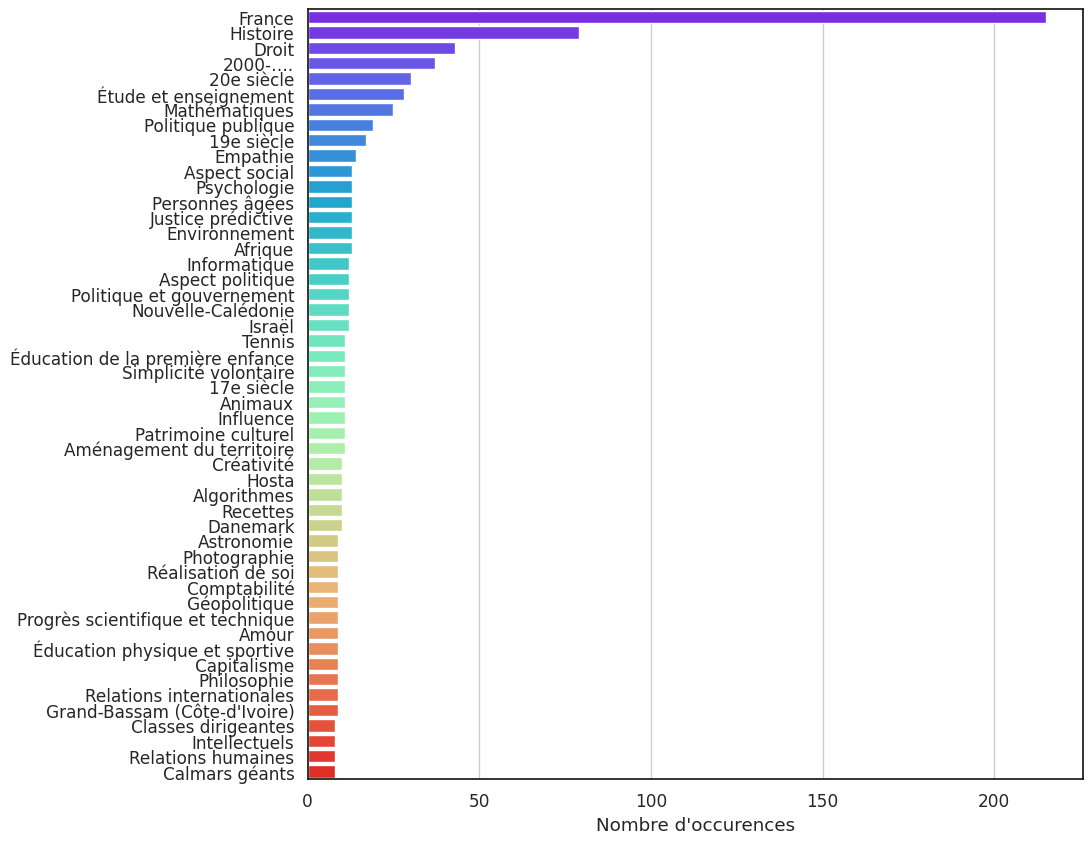

In [25]:
plot_barplot_of_tags(
    keywords,
    nb_of_tags=50,
    xlabel="Nombre d'occurences",
    ylabel="",
    figsave="barplot_concept_reindexation.png",
    figsize=(10, 10),
    palette="rainbow",
    orient="h",
)

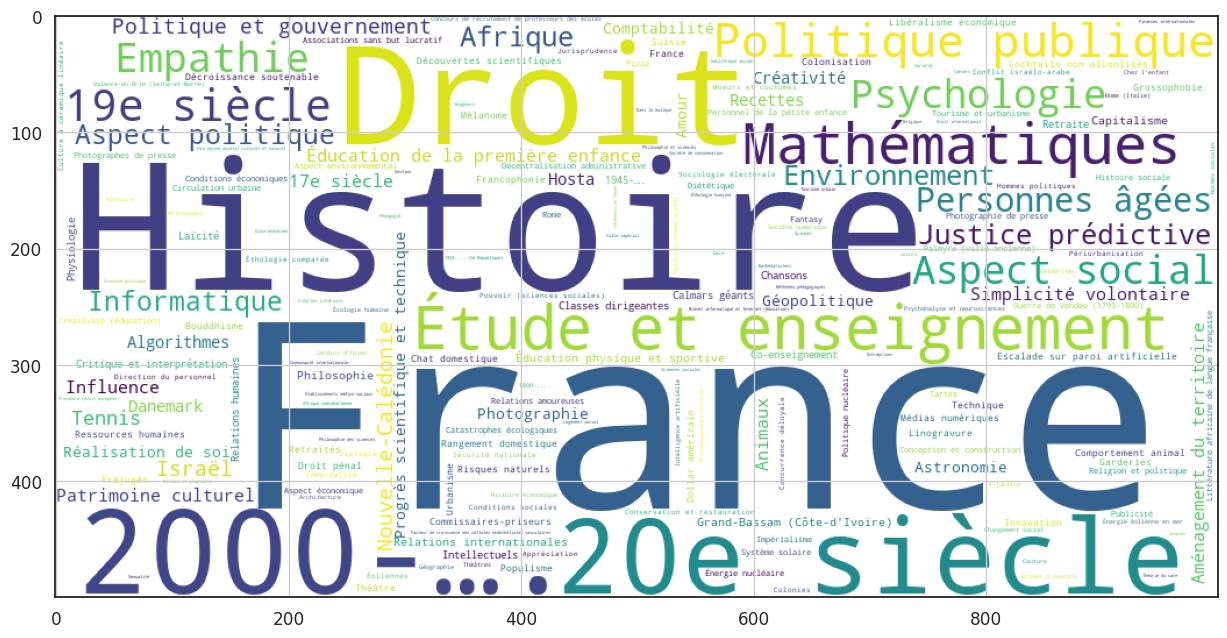

In [26]:
plot_wordcloud(
    keywords,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_reindexation.png",
)

In [27]:
all_possible_concepts =ram["NOM"].to_list()
print(f"Le dictionnaire RAMEAU contient {len(all_possible_concepts)} concepts differents")

Le dictionnaire RAMEAU contient 103628 concepts differents


# Multilabel classification

## By Concepts

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [29]:
mlb

MultiLabelBinarizer()

In [32]:
# Binarization
concepts = mlb.fit_transform([all_possible_concepts]) # all_concepts
concepts

array([[1, 1, 1, ..., 1, 1, 1]])

In [33]:
# Verification que l'on a bien encodé tous les concepts possibles
len(concepts[0])

103021

In [34]:
# Veridication de l'encoage
mlb.classes_

array(['!Xóõ (langue)',
       '"Sprach- und Sachatlas Italiens und der Südschweiz"',
       '"Taalatlas van Noord- en Zuid-Nederland"', ..., 'Ḥawfi', 'Ṭhumrī',
       'Ṭār (tambour), Musique de'], dtype=object)

In [37]:
# Binarisation des concepts
sudoc = mlb.transform(df["rameau_concepts"])
afe = mlb.transform(df["rameau_concept_AFE"])
mcr = mlb.transform(df["rameau_concept_MCR"])
jmf = mlb.transform(df["rameau_concept_JMF"])
lpl = mlb.transform(df["rameau_concept_LPL"])
ljz = mlb.transform(df["rameau_concept_LJZ"])
mpd = mlb.transform(df["rameau_concept_MPD"])

if include_embedding:
    embed = mlb.transform(df["embeddings_autorites"])

/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['1789-1799 (Révolution)', '17e siècle', '1800-….', '1945-….', '1958-.... (5e République)', '19e siècle', '2000-....', '2000-….', '20e siècle', 'Afrique', 'Afrique subsaharienne', 'Angers (Maine-et-Loire)', 'Aspect psychologique', 'Belgique', 'Brevet Informatique et Internet (pédagogie)', 'Cancers', 'Colombelles (Calvados)', 'Colonialisme et ethnologie', 'Construction et conception', 'Contrat Social', 'Danemark', 'France', 'Grand-Bassam', 'Géants du web', 'Histoire ', 'Israël', 'Littérature post-coloniale', 'Mythes', 'Méthodes pédagogiques', 'Nouvelle-Calédonie', 'Palmyre (ville ancienne)', 'Performances (sport)', 'Personnel de la santé publique', 'Pratiques sexuelles', 'Projets urbains', 'Rome (Italie)', 'Suisse', 'Suède', 'Valence-en-Brie (Seine-et-Marne)', 'Éco-anxiété ', 'Écrivains africains de la langue française', 'États-Unis', "Études d'impact"

In [38]:
from itertools import combinations_with_replacement


if include_embedding:
    index_name = ["sudoc", "embeddings", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]
    concept_list = [sudoc, embed, afe, mcr, jmf, lpl, ljz, mpd]
else: 
    index_name = ["sudoc", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]
    concept_list = [sudoc, afe, mcr, jmf, lpl, ljz, mpd]
results = dict()

for names, concept in zip(list(combinations_with_replacement(index_name, 2)), list(combinations_with_replacement(concept_list, 2))):
    print(f"comparing {names[0]} and  {names[1]}")
    name = str(names[0] + '-' + names[1])
    results[name] = label_metrics_report("reindexation_concepts", y_true=concept[0], y_pred=concept[1], zero_division=0)

comparing sudoc and  sudoc


comparing sudoc and  afe
comparing sudoc and  mcr
comparing sudoc and  jmf
comparing sudoc and  lpl
comparing sudoc and  ljz
comparing sudoc and  mpd
comparing afe and  afe
comparing afe and  mcr
comparing afe and  jmf
comparing afe and  lpl
comparing afe and  ljz
comparing afe and  mpd


### Dataframe of results

In [ ]:
result_df = pd.DataFrame(results).T
result_df

Hamming Loss Brier Loss Accuracy Precision - Macro   
sudoc-sudoc                    0.0        NaN      1.0          0.002349  \
sudoc-embeddings          0.000026        NaN      0.0               0.0   
sudoc-afe                 0.000033        NaN     0.06          0.000837   
sudoc-mcr                 0.000038        NaN     0.04          0.000718   
sudoc-jmf                  0.00004        NaN     0.03          0.000769   
sudoc-lpl                 0.000032        NaN     0.07          0.000968   
sudoc-ljz                  0.00004        NaN     0.02          0.000648   
sudoc-mpd                 0.000027        NaN     0.11          0.001155   
embeddings-embeddings          0.0        NaN      1.0               0.0   
embeddings-afe            0.000026        NaN      0.0               0.0   
embeddings-mcr            0.000028        NaN      0.0               0.0   
embeddings-jmf             0.00003        NaN      0.0               0.0   
embeddings-lpl            0.000027        NaN      0.0               0.0   
embeddings-ljz            0.000028        NaN     0.01               0.0   
embeddings-mpd            0.000027        NaN      0.0               0.0   
afe-afe                        0.0        NaN      1.0          0.002174   
afe-mcr                   0.000036        NaN     0.06          0.000792   
afe-jmf                   0.000034        NaN     0.03          0.000936   
afe-lpl                    0.00003        NaN     0.05          0.000966   
afe-ljz                   0.000031        NaN     0.02          0.000981   
afe-mpd                   0.000025        NaN     0.13          0.001207   
mcr-mcr                        0.0        NaN      1.0          0.002475   
mcr-jmf                   0.000039        NaN     0.05          0.000852   
mcr-lpl                   0.000036        NaN     0.01          0.000784   
mcr-ljz                   0.000039        NaN      0.0          0.000764   
mcr-mpd                   0.000033        NaN     0.09          0.000986   
jmf-jmf                        0.0        NaN      1.0           0.00265   
jmf-lpl                   0.000036        NaN     0.05           0.00088   
jmf-ljz                   0.000038        NaN     0.01          0.000839   
jmf-mpd                   0.000034        NaN     0.04           0.00099   
lpl-lpl                        0.0        NaN      1.0          0.002262   
lpl-ljz                   0.000035        NaN     0.03           0.00082   
lpl-mpd                   0.000027        NaN     0.11          0.001119   
ljz-ljz                        0.0        NaN      1.0          0.002398   
ljz-mpd                   0.000033        NaN     0.03          0.000923   
mpd-mpd                        0.0        NaN      1.0          0.002349   

                      Recall - Macro F1_Score - Macro Jaccard - Macro   
sudoc-sudoc                 0.002349         0.002349        0.002349  \
sudoc-embeddings                 0.0              0.0             0.0   
sudoc-afe                   0.000863          0.00084        0.000815   
sudoc-mcr                   0.000714         0.000705        0.000677   
sudoc-jmf                   0.000773         0.000761        0.000744   
sudoc-lpl                   0.000968         0.000953        0.000931   
sudoc-ljz                   0.000635          0.00063         0.00061   
sudoc-mpd                   0.001178         0.001151        0.001123   
embeddings-embeddings            0.0              0.0             0.0   
embeddings-afe                   0.0              0.0             0.0   
embeddings-mcr                   0.0              0.0             0.0   
embeddings-jmf                   0.0              0.0             0.0   
embeddings-lpl                   0.0              0.0             0.0   
embeddings-ljz                   0.0              0.0             0.0   
embeddings-mpd                   0.0              0.0             0.0   
afe-afe                     0.002174     

In [ ]:
# Get max score
result_df.sort_values(by="Jaccard - Sample")

Hamming Loss Brier Loss Accuracy Precision - Macro   
embeddings-mpd            0.000027        NaN      0.0               0.0  \
embeddings-ljz            0.000028        NaN     0.01               0.0   
embeddings-lpl            0.000027        NaN      0.0               0.0   
embeddings-jmf             0.00003        NaN      0.0               0.0   
embeddings-mcr            0.000028        NaN      0.0               0.0   
embeddings-embeddings          0.0        NaN      1.0               0.0   
embeddings-afe            0.000026        NaN      0.0               0.0   
sudoc-embeddings          0.000026        NaN      0.0               0.0   
sudoc-ljz                  0.00004        NaN     0.02          0.000648   
mcr-ljz                   0.000039        NaN      0.0          0.000764   
sudoc-jmf                  0.00004        NaN     0.03          0.000769   
jmf-ljz                   0.000038        NaN     0.01          0.000839   
sudoc-mcr                 0.000038        NaN     0.04          0.000718   
mcr-lpl                   0.000036        NaN     0.01          0.000784   
mcr-jmf                   0.000039        NaN     0.05          0.000852   
lpl-ljz                   0.000035        NaN     0.03           0.00082   
afe-mcr                   0.000036        NaN     0.06          0.000792   
jmf-lpl                   0.000036        NaN     0.05           0.00088   
ljz-mpd                   0.000033        NaN     0.03          0.000923   
afe-jmf                   0.000034        NaN     0.03          0.000936   
sudoc-afe                 0.000033        NaN     0.06          0.000837   
afe-ljz                   0.000031        NaN     0.02          0.000981   
jmf-mpd                   0.000034        NaN     0.04           0.00099   
sudoc-lpl                 0.000032        NaN     0.07          0.000968   
mcr-mpd                   0.000033        NaN     0.09          0.000986   
afe-lpl                    0.00003        NaN     0.05          0.000966   
sudoc-mpd                 0.000027        NaN     0.11          0.001155   
lpl-mpd                   0.000027        NaN     0.11          0.001119   
afe-mpd                   0.000025        NaN     0.13          0.001207   
ljz-ljz                        0.0        NaN      1.0          0.002398   
sudoc-sudoc                    0.0        NaN      1.0          0.002349   
jmf-jmf                        0.0        NaN      1.0           0.00265   
mcr-mcr                        0.0        NaN      1.0          0.002475   
afe-afe                        0.0        NaN      1.0          0.002174   
lpl-lpl                        0.0        NaN      1.0          0.002262   
mpd-mpd                        0.0        NaN      1.0          0.002349   

                      Recall - Macro F1_Score - Macro Jaccard - Macro   
embeddings-mpd                   0.0              0.0             0.0  \
embeddings-ljz                   0.0              0.0             0.0   
embeddings-lpl                   0.0              0.0             0.0   
embeddings-jmf                   0.0              0.0             0.0   
embeddings-mcr                   0.0              0.0             0.0   
embeddings-embeddings            0.0              0.0             0.0   
embeddings-afe                   0.0              0.0             0.0   
sudoc-embeddings                 0.0              0.0             0.0   
sudoc-ljz                   0.000635          0.00063         0.00061   
mcr-ljz                      0.00077         0.000756        0.000739   
sudoc-jmf                   0.000773         0.000761        0.000744   
jmf-ljz                     0.000844         0.000834        0.000816   
sudoc-mcr                   0.000714         0.000705        0.000677   
mcr-lpl                     0.000789         0.000771        0.000746   
mcr-jmf                     0.000868         0.000844        0.000818   
lpl-ljz                     0.000829     

In [ ]:
metrics = [
    'Precision - Weighted', 'Recall - Weighted', 'F1_Score - Weighted', 'Jaccard - Weighted',
    'Precision - Sample', 'Recall - Sample', 'F1_Score - Sample', 'Jaccard - Sample']

### Plot

In [ ]:
# Plot results
metrics_radar_plot(
    result_df,
    metrics = metrics,
    remove_identity=True,
    title="Prédiction des concepts",
    savefig="metrics_reindexation_concepts_raw.html",)

#### Metrics on few samples

In [ ]:
# Set Choices
idx = range(49, 55)
compare1 = ["rameau_concepts", sudoc]  # "rameau_concepts", "embeddings_autorites", "rameau_concept_AFE", "rameau_concept_MCR", "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ","rameau_concept_MPD"
compare2 = ["rameau_concept_MPD", mpd]  # "rameau_concepts", "embeddings_autorites", "rameau_concept_AFE", "rameau_concept_MCR", "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ","rameau_concept_MPD"
compare3 = ["embeddings_autorites", embed]  # "rameau_concepts", "embeddings_autorites", "rameau_concept_AFE", "rameau_concept_MCR", "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ","rameau_concept_MPD"

In [ ]:
pd.set_option('display.max_colwidth', None)
df.loc[idx, [compare1[0], compare2[0], compare3[0]]]

rameau_concept   
49                                                                                                                 [Moeurs et coutumes]  \
50  [Droit, Informatique, Aspect moral, Droit et morale, Justice, Automatisation, Justice prédictive, Procédure pénale, Automatisation]   
51                                                                             [Mathématiciens, Mathématiques, Mathématiques, Histoire]   
52                                                                                         [Populisme, Aspect religieux, Christianisme]   
53                                                           [Décision politique, Génie civil, Pratique, Urbanisme, Politique publique]   
54                                                                   [Chat domestique, Comportement animal, Chat domestique, Recherche]   

                                                                                                     rameau_concept_MPD   
49                           [Conditions sociales, Danemark, Moeurs et coutumes, Danemark, Qualité de la vie, Danemark]  \
50                                         [Justice prédictive, Algorithmes, Droit, Informatique, Aspect moral, France]   
51                                                              [Mathématiciens, 19e siècle, Mathématiques, 19e siècle]   
52                                                                                   [Populisme, Religion et politique]   
53  [Urbanisme, Politique publique, France, Eau, Politique publique, France, Environnement, Politique publique, France]   
54               [Chat domestique, Comportement animal, Chat domestique, Aspect socio-culturel, Relations homme-animal]   

                                                                                                                                                                   embeddings_autorites  
49                               ['Danois', 'Moeurs et coutumes', 'Dandys', 'Inquiétude', 'Roman suédois', 'Traductions françaises', 'Caractère national danois', 'Secrets de famille']  
50           ['Justice prédictive', 'E-justice', 'Droit', 'Informatique', 'Aspect moral', 'Procédure pénale', 'Aspect moral', 'Automatisation', 'Aspect moral', 'Algorithmes', 'Droit']  
51               ['Fourier', ' Séries de', 'Ondelettes', 'Fourier', ' Analyse de', 'Flûte', 'Histoire', 'Musique et mathématiques', 'Fourier', ' Analyse de', 'Problèmes et exercices']  
52                                                             ['Coexistence religieuse', 'Religion et politique', 'Christianisme', 'Religions', 'Islam et État', 'Islam et politique']  
53  ['Décision politique', 'Politique publique', 'Logement', 'Politique publique', 'Politique publique', 'Évaluation', 'Sociologie politique', 'Administration publique', 'Sociologie']  
54              ['Chat domestique', 'Comportement animal', 'Chat domestique', 'Chat domestique', 'Histoire', 'Chats', 'Médias et culture', 'Chat domestique', 'Ouvrages humoristiques']

In [ ]:
concept_list = [compare1[1][idx], compare2[1][idx]]
index_name = [compare1[0], compare2[0]]
results = dict()

name = str(index_name[0] + '-' + index_name[1])
results[name] = label_metrics_report("reindexation_concepts", y_true=concept_list[0], y_pred=concept_list[1], zero_division=0)
result_df = pd.DataFrame(results)
result_df.drop(index=["F1-measure", "Jaccard", "Precision", "Recall"])

rameau_concept-rameau_concept_MPD
Accuracy                                           0.0
Brier Loss                                         NaN
F1_Score - Macro                              0.000116
F1_Score - Sample                             0.587749
F1_Score - Weighted                           0.545455
Hamming Loss                                  0.000028
Jaccard - Macro                               0.000116
Jaccard - Sample                              0.427249
Jaccard - Weighted                            0.545455
Precision - Macro                             0.000116
Precision - Sample                            0.633333
Precision - Weighted                          0.545455
Recall - Macro                                0.000116
Recall - Sample                               0.622222
Recall - Weighted                             0.545455

In [ ]:
# Plot results
metrics_radar_plot(
    result_df.T,
    title="Prédiction des concepts par Indexeur")

## By indexation Chains

### Get indexation chains

In [ ]:
# Mettre à plat TOUTES les chaines d'indexation
pattern = r';;\s*(?![^()$]*\))'
if include_embedding:
    df["embedding_chains"] = df["embedding_chains"].apply(lambda x: eval(x))
for col in index_columns:
    name = col.split("_")[1]
    print("Dealing with: ", name)
    new_col = str('rameau_index_chain_' + name)
    df[new_col] = df[col].apply(lambda x: re.split(pattern, str(x)))


TypeError: eval() arg 1 must be a string, bytes or code object

## Format data

In [ ]:
col_to_keep = [
    "PPN", "RAMEAU_chaines_index", "rameau_index_chain_AFE",
    "rameau_index_chain_MCR", "rameau_index_chain_JMF",
    "rameau_index_chain_LPL", "rameau_index_chain_LJZ", "rameau_index_chain_MPD"]
if include_embedding:
    col_to_keep = [
        "PPN", "RAMEAU_chaines_index", "embedding_chains", "rameau_index_chain_AFE",
        "rameau_index_chain_MCR", "rameau_index_chain_JMF",
        "rameau_index_chain_LPL", "rameau_index_chain_LJZ", "rameau_index_chain_MPD"]
df_index_chain_pivot = pd.melt(df[col_to_keep], id_vars=["PPN"])
df_index_chain_pivot

PPN                variable   
0    000308838           RAMEAU_chains  \
1    003632806           RAMEAU_chains   
2    047450037           RAMEAU_chains   
3    058296182           RAMEAU_chains   
4    059911174           RAMEAU_chains   
..         ...                     ...   
795  23690454X  rameau_index_chain_MPD   
796  24155859X  rameau_index_chain_MPD   
797  25561280X  rameau_index_chain_MPD   
798  26117309X  rameau_index_chain_MPD   
799  26753177X  rameau_index_chain_MPD   

                                                                                                                                                    value  
0    [Bureaucratie, Classes dirigeantes, Classes dirigeantes, Hauts fonctionnaires, Hommes politiques, Pouvoir (sciences sociales), Pratiques politiques]  
1                                                                                                                 [Intellectuels, Intellectuels français]  
2                                                                                                                                            [Bouddhisme]  
3           [Chaos (théorie des systèmes), Incertitude, Libre arbitre, Philosophie des sciences, Philosophie et sciences, Processus irréversibles, Temps]  
4                                                                   [Pouvoir (sciences sociales) -- Histoire, Rites et cérémonies politiques -- Histoire]  
..                                                                                                                                                    ...  
795                                                                              [Patrimoine culturel -- Droit, Patrimoine culturel -- Droit -- Histoire]  
796                                                        [Installations sonores (art), Art -- Méthodes expérimentales, Artistes -- Suède -- 20e siècle]  
797                                                                        [Mouvements sociaux -- France -- 2000-...., Postmodernisme, Crises politiques]  
798                                                                    [Chansons -- Thèmes, motifs, Musique et géographie, Géographie -- Dans la musique]  
799                                                                      [Société numérique, Algorithmes -- Utilisation, Algorithmes -- Aspect politique]  

[800 rows x 3 columns]

In [ ]:
chains=df_index_chain_pivot["value"]
index_chains = flatten(chains)
print(f"Le dataset contient {len(set(index_chains))} chaines d'indexation differentes")

Le dataset contient 1633 chaines d'indexation differentes


In [ ]:
# remove strange characters
index_chains2 = [x.lstrip(r";|''").rstrip(r";|''") for x in index_chains]
print(f"Le dataset contient {len(set(index_chains2))} chaines d'indexation differentes")

Le dataset contient 1633 chaines d'indexation differentes


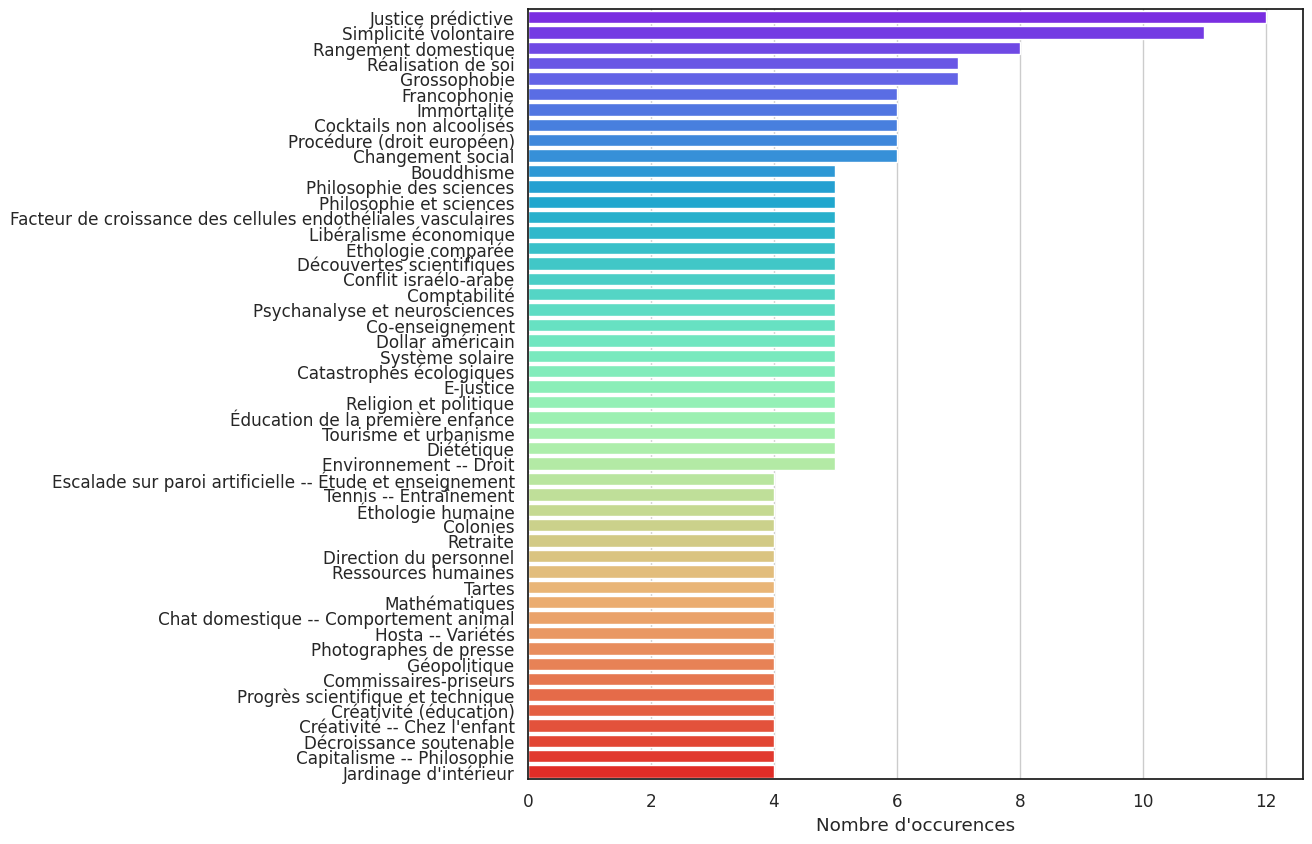

In [ ]:
plot_barplot_of_tags(
    index_chains2,
    nb_of_tags=50,
    xlabel="Nombre d'occurences",
    ylabel="",
    figsave="barplot_indexationChains_reindexation.png",
    figsize=(10, 10),
    palette="rainbow",
    orient="h",
)

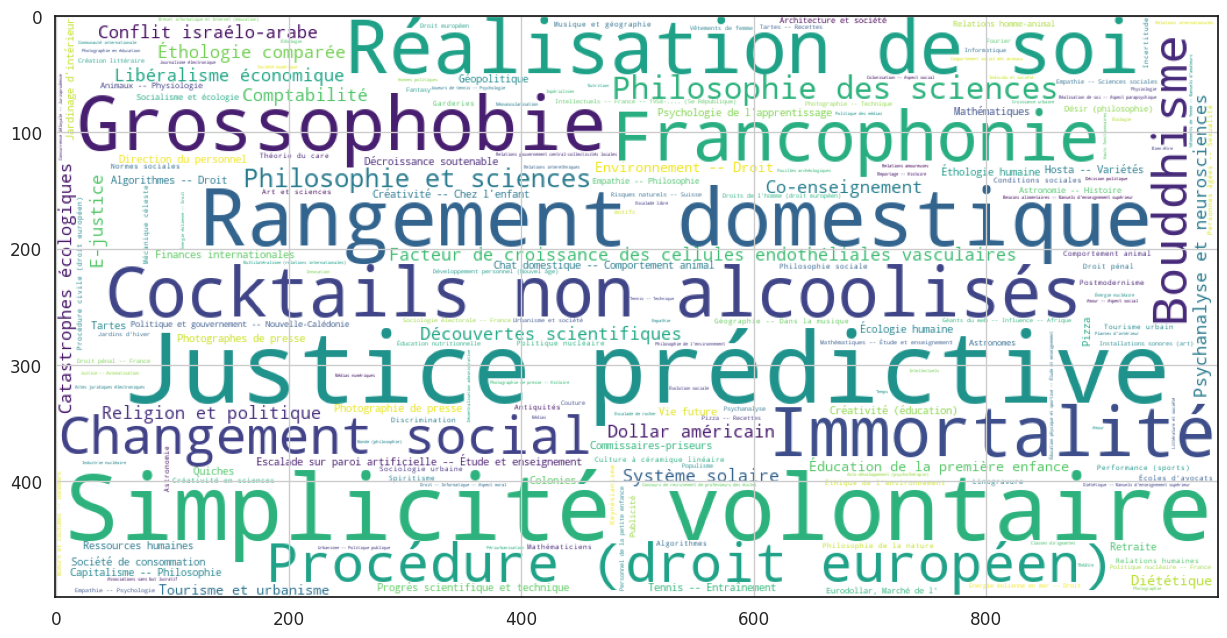

In [ ]:
plot_wordcloud(
    index_chains,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_index_chains_reindexation.png",
)

In [ ]:
# Binarization et vérification de l'encodage
index_chains_rameau = mlb.fit_transform([index_chains]) # all indexation chains
mlb.classes_

array([' Analyse de', ' Analyse de -- Problèmes et exercices',
       ' Séries de', ..., "Études d'impact (administration publique)",
       'Évolution du comportement', 'Évolution sociale'], dtype=object)

In [ ]:
sudoc = mlb.transform(df["RAMEAU_chaines_index"])
afe = mlb.transform(df["rameau_index_chain_AFE"])
mcr = mlb.transform(df["rameau_index_chain_MCR"])
jmf = mlb.transform(df["rameau_index_chain_JMF"])
lpl = mlb.transform(df["rameau_index_chain_LPL"])
ljz = mlb.transform(df["rameau_index_chain_LJZ"])
mpd = mlb.transform(df["rameau_index_chain_MPD"])

if include_embedding:
    embed = mlb.transform(df["embedding_chains"])

In [ ]:
# Vérification de l'encodage
mlb.inverse_transform(afe)

[('Classes dirigeantes -- France -- Histoire',
  'Pouvoir communautaire -- France'),
 ('Intellectuels -- France -- 1958-.... (5e République)',),
 ('Bouddhisme',),
 ('Philosophie et sciences',),
 ('Culte impérial -- Rome (Italie)', 'Empereurs -- Rome (Italie)'),
 ('Escalade sur paroi artificielle -- Méthodes pédagogiques',
  'Escalade sur paroi artificielle -- Étude et enseignement'),
 ('Brevet Informatique et Internet (pédagogie)', 'Informatique'),
 ('Énergie éolienne en mer -- Droit',
  'Éoliennes -- Aménagement',
  'Éoliennes -- Construction et conception'),
 ('Autonomie et mouvements indépendantistes -- Nouvelle-Calédonie',
  'Politique et gouvernement -- Nouvelle-Calédonie'),
 ('Francophonie',),
 ('Mélanome -- Cancers', 'Peau -- Cancers'),
 ('Astronomes', 'Astronomie -- Histoire', 'Système solaire'),
 ('Libéralisme économique', 'Économistes -- 20e siècle'),
 ('Mobilités urbaines -- Histoire sociale -- France',
  'Transports urbains -- Histoire sociale -- France'),
 ('Tennis -- Apti

In [ ]:
# Compute metrics
from itertools import combinations_with_replacement

if include_embedding:
    concept_list = [sudoc, embed, afe, mcr, jmf, lpl, ljz, mpd]
    index_name = ["sudoc", "embeddings", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]
else:
    concept_list = [sudoc, afe, mcr, jmf, lpl, ljz, mpd]
    index_name = ["sudoc", "afe", "mcr", "jmf", "lpl", "ljz", "mpd"]

result_chains = dict()

for names, concept in zip(list(combinations_with_replacement(index_name, 2)), list(combinations_with_replacement(concept_list, 2))):
    print(f"comparing {names[0]} and  {names[1]}")
    name = str(names[0] + '-' + names[1])
    result_chains[name] = label_metrics_report("reindexation_chains", concept[0], concept[1], zero_division=0)

comparing sudoc and  sudoc
comparing sudoc and  embeddings
comparing sudoc and  afe
comparing sudoc and  mcr
comparing sudoc and  jmf
comparing sudoc and  lpl
comparing sudoc and  ljz
comparing sudoc and  mpd
comparing embeddings and  embeddings
comparing embeddings and  afe
comparing embeddings and  mcr
comparing embeddings and  jmf
comparing embeddings and  lpl
comparing embeddings and  ljz
comparing embeddings and  mpd
comparing afe and  afe
comparing afe and  mcr
comparing afe and  jmf
comparing afe and  lpl
comparing afe and  ljz
comparing afe and  mpd
comparing mcr and  mcr
comparing mcr and  jmf
comparing mcr and  lpl
comparing mcr and  ljz
comparing mcr and  mpd
comparing jmf and  jmf
comparing jmf and  lpl
comparing jmf and  ljz
comparing jmf and  mpd
comparing lpl and  lpl
comparing lpl and  ljz
comparing lpl and  mpd
comparing ljz and  ljz
comparing ljz and  mpd
comparing mpd and  mpd


In [ ]:
# Exemple de metrics
label_metrics_report("reindexation_chains", y_true=sudoc[0:5], y_pred=afe[0:5], zero_division=0, print_metrics=True)

------reindexation_chains Model Metrics-----
Accuracy: 0.2000
Hamming Loss: 0.0026\Brier score Loss: nan
Precision:
  - Macro: 0.0012
  - Micro: 0.2857
Recall:
  - Macro: 0.0012
  - Micro: 0.1111
F1-measure:
  - Macro: 0.0012
  - Micro: 0.1600
Jaccard similarity:
  - Macro: 0.0012
  - Micro: 0.0870


/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



{'Hamming Loss': 0.0025719534598897735,
 'Brier Loss': nan,
 'Accuracy': 0.2,
 'Precision - Macro': 0.001224739742804654,
 'Recall - Macro': 0.001224739742804654,
 'F1_Score - Macro': 0.001224739742804654,
 'Jaccard - Macro': 0.001224739742804654,
 'Precision - Weighted': 0.1111111111111111,
 'Recall - Weighted': 0.1111111111111111,
 'F1_Score - Weighted': 0.1111111111111111,
 'Jaccard - Weighted': 0.1111111111111111,
 'Precision - Sample': 0.4,
 'Recall - Sample': 0.22857142857142856,
 'F1_Score - Sample': 0.25,
 'Jaccard - Sample': 0.22857142857142856,
 'Precision': {'Macro': 0.001224739742804654,
  'Micro': 0.2857142857142857,
  'Sample': 0.4},
 'Recall': {'Macro': 0.001224739742804654,
  'Micro': 0.1111111111111111,
  'Sample': 0.22857142857142856},
 'F1-measure': {'Macro': 0.001224739742804654, 'Micro': 0.16, 'Sample': 0.25},
 'Jaccard': {'Macro': 0.001224739742804654,
  'Micro': 0.08695652173913043,
  'Sample': 0.22857142857142856}}

### Dataframe of results

In [ ]:
result_chains_df = pd.DataFrame(result_chains).T
result_chains_df

Hamming Loss Brier Loss Accuracy Precision - Macro   
sudoc-sudoc                    0.0        NaN      1.0           0.13962  \
sudoc-embeddings          0.004274        NaN      0.0          0.041029   
sudoc-afe                 0.002394        NaN     0.03          0.015309   
sudoc-mcr                 0.002296        NaN     0.03          0.007655   
sudoc-jmf                 0.002682        NaN     0.01          0.016126   
sudoc-lpl                 0.002468        NaN     0.04          0.020208   
sudoc-ljz                 0.002652        NaN     0.01          0.015309   
sudoc-mpd                  0.00229        NaN     0.08          0.026638   
embeddings-embeddings          0.0        NaN      1.0          0.355175   
embeddings-afe            0.004648        NaN      0.0          0.015922   
embeddings-mcr            0.004599        NaN      0.0          0.005818   
embeddings-jmf            0.004874        NaN      0.0          0.019086   
embeddings-lpl             0.00477        NaN      0.0          0.018371   
embeddings-ljz            0.004783        NaN      0.0          0.021739   
embeddings-mpd            0.004691        NaN      0.0          0.019902   
afe-afe                        0.0        NaN      1.0          0.126761   
afe-mcr                   0.002131        NaN     0.04          0.008573   
afe-jmf                   0.002517        NaN     0.02          0.016432   
afe-lpl                   0.002376        NaN     0.01          0.017146   
afe-ljz                    0.00229        NaN     0.01          0.025107   
afe-mpd                   0.001929        NaN     0.08          0.037048   
mcr-mcr                        0.0        NaN      1.0          0.101653   
mcr-jmf                   0.002505        NaN      0.0          0.005205   
mcr-lpl                     0.0024        NaN      0.0          0.003062   
mcr-ljz                   0.002449        NaN      0.0          0.005511   
mcr-mpd                   0.002223        NaN     0.02          0.009798   
jmf-jmf                        0.0        NaN      1.0          0.156767   
jmf-lpl                   0.002725        NaN     0.01          0.015309   
jmf-ljz                    0.00275        NaN     0.01          0.017759   
jmf-mpd                   0.002511        NaN     0.02           0.02327   
lpl-lpl                        0.0        NaN      1.0          0.141457   
lpl-ljz                   0.002633        NaN     0.01           0.01684   
lpl-mpd                   0.002162        NaN     0.04           0.03368   
ljz-ljz                        0.0        NaN      1.0          0.150643   
ljz-mpd                   0.002443        NaN     0.02          0.024189   
mpd-mpd                        0.0        NaN      1.0          0.139008   

                      Recall - Macro F1_Score - Macro Jaccard - Macro   
sudoc-sudoc                  0.13962          0.13962         0.13962  \
sudoc-embeddings            0.041641         0.041029        0.040416   
sudoc-afe                   0.015309         0.015309        0.015309   
sudoc-mcr                   0.007655         0.007553        0.007348   
sudoc-jmf                   0.016534         0.016228        0.016126   
sudoc-lpl                   0.019596           0.0198        0.019596   
sudoc-ljz                   0.015309         0.015309        0.015309   
sudoc-mpd                   0.026638         0.026536        0.026332   
embeddings-embeddings       0.355175         0.355175        0.355175   
embeddings-afe              0.015003         0.015309        0.015003   
embeddings-mcr              0.006124          0.00592        0.005818   
embeddings-jmf               0.01929         0.019065        0.018779   
embeddings-lpl              0.017044         0.017453        0.017044   
embeddings-ljz              0.020514         0.020923        0.020412   
embeddings-mpd               0.01929         0.019494        0.019188   
afe-afe                     0.126761     

In [ ]:
# Get max score
result_chains_df.sort_values(by="Jaccard - Sample", ascending=False)

Hamming Loss Brier Loss Accuracy Precision - Macro   
sudoc-sudoc                    0.0        NaN      1.0           0.13962  \
embeddings-embeddings          0.0        NaN      1.0          0.355175   
ljz-ljz                        0.0        NaN      1.0          0.150643   
lpl-lpl                        0.0        NaN      1.0          0.141457   
jmf-jmf                        0.0        NaN      1.0          0.156767   
mcr-mcr                        0.0        NaN      1.0          0.101653   
afe-afe                        0.0        NaN      1.0          0.126761   
mpd-mpd                        0.0        NaN      1.0          0.139008   
afe-mpd                   0.001929        NaN     0.08          0.037048   
lpl-mpd                   0.002162        NaN     0.04           0.03368   
sudoc-mpd                  0.00229        NaN     0.08          0.026638   
afe-ljz                    0.00229        NaN     0.01          0.025107   
jmf-mpd                   0.002511        NaN     0.02           0.02327   
ljz-mpd                   0.002443        NaN     0.02          0.024189   
sudoc-lpl                 0.002468        NaN     0.04          0.020208   
sudoc-afe                 0.002394        NaN     0.03          0.015309   
sudoc-embeddings          0.004274        NaN      0.0          0.041029   
afe-jmf                   0.002517        NaN     0.02          0.016432   
afe-lpl                   0.002376        NaN     0.01          0.017146   
jmf-ljz                    0.00275        NaN     0.01          0.017759   
sudoc-jmf                 0.002682        NaN     0.01          0.016126   
sudoc-ljz                 0.002652        NaN     0.01          0.015309   
lpl-ljz                   0.002633        NaN     0.01           0.01684   
jmf-lpl                   0.002725        NaN     0.01          0.015309   
afe-mcr                   0.002131        NaN     0.04          0.008573   
mcr-mpd                   0.002223        NaN     0.02          0.009798   
sudoc-mcr                 0.002296        NaN     0.03          0.007655   
embeddings-ljz            0.004783        NaN      0.0          0.021739   
embeddings-jmf            0.004874        NaN      0.0          0.019086   
embeddings-mpd            0.004691        NaN      0.0          0.019902   
embeddings-lpl             0.00477        NaN      0.0          0.018371   
embeddings-afe            0.004648        NaN      0.0          0.015922   
mcr-jmf                   0.002505        NaN      0.0          0.005205   
mcr-ljz                   0.002449        NaN      0.0          0.005511   
mcr-lpl                     0.0024        NaN      0.0          0.003062   
embeddings-mcr            0.004599        NaN      0.0          0.005818   

                      Recall - Macro F1_Score - Macro Jaccard - Macro   
sudoc-sudoc                  0.13962          0.13962         0.13962  \
embeddings-embeddings       0.355175         0.355175        0.355175   
ljz-ljz                     0.150643         0.150643        0.150643   
lpl-lpl                     0.141457         0.141457        0.141457   
jmf-jmf                     0.156767         0.156767        0.156767   
mcr-mcr                     0.101653         0.101653        0.101653   
afe-afe                     0.126761         0.126761        0.126761   
mpd-mpd                     0.139008         0.139008        0.139008   
afe-mpd                     0.037048         0.036946        0.036742   
lpl-mpd                      0.03368          0.03368         0.03368   
sudoc-mpd                   0.026638         0.026536        0.026332   
afe-ljz                      0.02572         0.025311        0.025107   
jmf-mpd                     0.022454         0.022739        0.022454   
ljz-mpd                     0.023882         0.023984         0.02378   
sudoc-lpl                   0.019596           0.0198        0.019596   
sudoc-afe                   0.015309     

### Plot

In [ ]:
# Plot results
metrics_radar_plot(
    result_chains_df,
    metrics=metrics,
    remove_identity=True,
    title="Prédiction des chaines d'indexation",
    savefig="metrics_reindexation_Chains_raw.html",)

## Bag of words (tf-idf or CountVectorizer)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### tfID vectorizer

In [ ]:
def identity_tokenizer(text):
    return text
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, ngram_range=(1,3), lowercase=False)

In [ ]:
# Vectorization
vectorised_concepts = vectorizer.fit_transform(labels)
autorites = vectorizer.get_feature_names_out()

/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

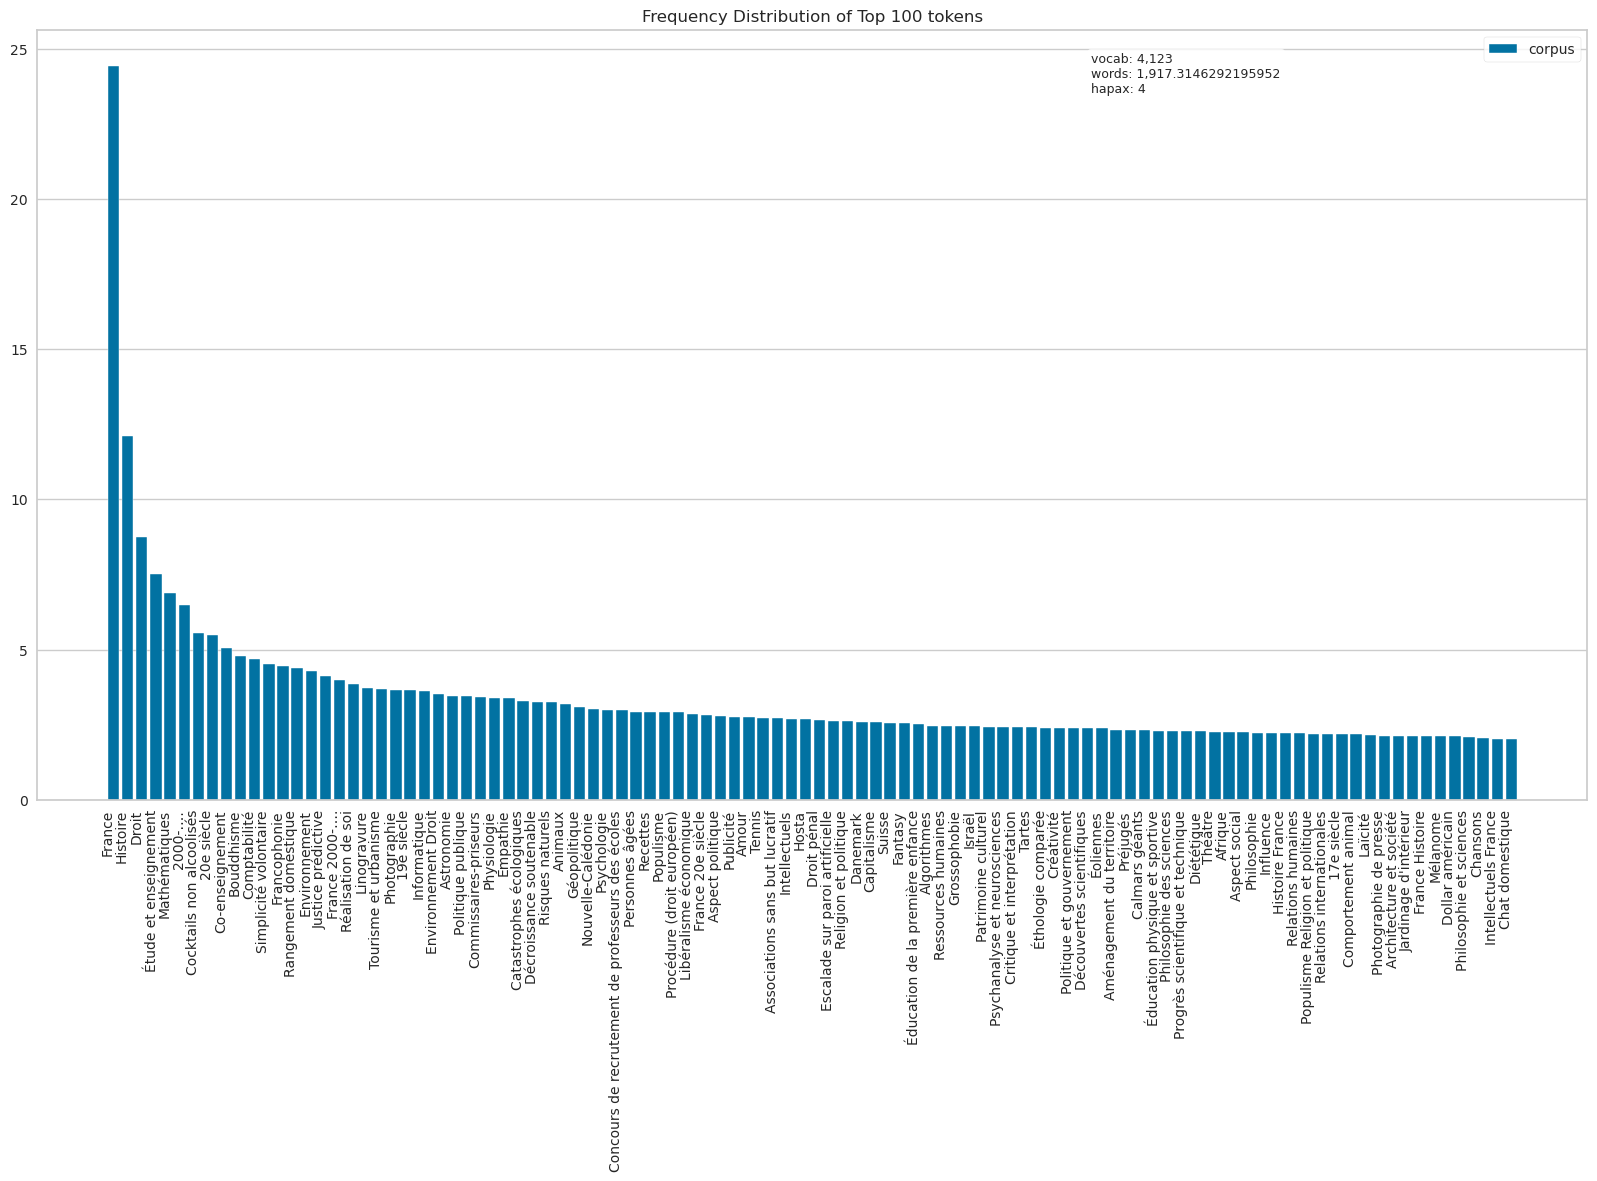

<Axes: title={'center': 'Frequency Distribution of Top 100 tokens'}>

In [ ]:
from yellowbrick.text import FreqDistVisualizer
plt.figure(figsize=(20, 10))
features = vectorizer.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, n=100, orient="v")
visualizer.fit(vectorised_concepts)
visualizer.show()

/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial

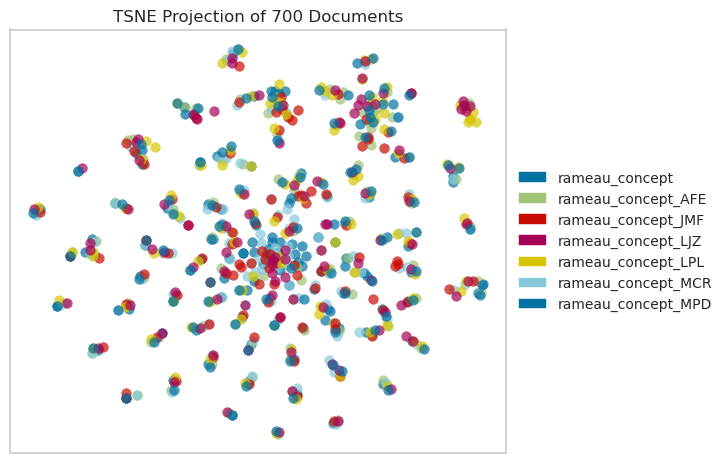

<Axes: title={'center': 'TSNE Projection of 700 Documents'}>

In [ ]:
# Visualize the dataset with T-SNE
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(vectorised_concepts, df_pivot["variable"])
tsne.show()

### Count vectorizer

In [ ]:
vectorizer = CountVectorizer(tokenizer=identity_tokenizer, ngram_range=(1,3), lowercase=False)
vectorised_concepts = vectorizer.fit_transform(df_pivot["value"])

/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
# Vectorization
vectorised_concepts = vectorizer.fit_transform(labels, df_pivot["variable"])
autorites = vectorizer.get_feature_names_out()

/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/yellowbrick/text/tsne.py:401: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial

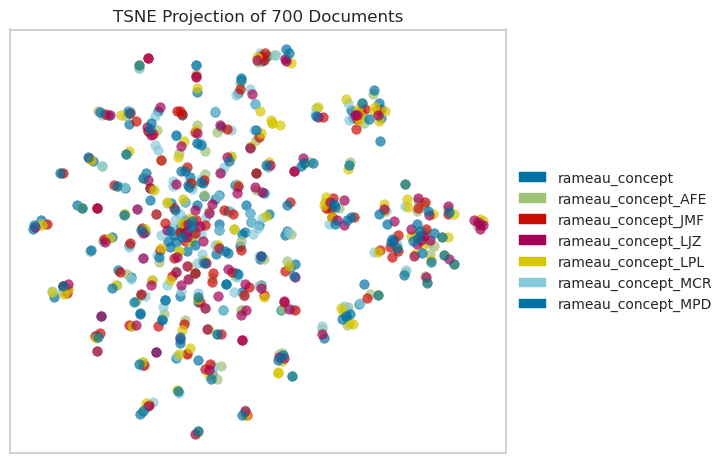

<Axes: title={'center': 'TSNE Projection of 700 Documents'}>

In [ ]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(vectorised_concepts, df_pivot["variable"])
tsne.show()

## Test kmeans


In [ ]:
# Select columns to use
concept_cols = [
    "rameau_concept", "rameau_concept_AFE", "rameau_concept_MCR",
    "rameau_concept_JMF", "rameau_concept_LPL", "rameau_concept_LJZ",
    "rameau_concept_MPD"]
df_for_analysis = df[concept_cols]
labels_encoded = pd.DataFrame(mlb.fit_transform(flatten(df_pivot["value"])))

In [ ]:
len(labels_encoded), len(labels_encoded[0])

(2882, 2882)

In [ ]:
# Clustering based on Kmeans
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
# test different clusters
sil = []
davis_bouldin = []
sum_of_squared_distances = []
param_range = range(3,100)
for k in param_range:
    print(f"Clustering with {k} groups")
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(labels_encoded)
    labels = kmeans.labels_
    sum_of_squared_distances.append(kmeans.inertia_)
    silh = silhouette_score(
        labels_encoded, labels, metric="euclidean", sample_size=50000, random_state=200
        )
    dav = davies_bouldin_score(labels_encoded, labels)
    sil.append(silh)
    davis_bouldin.append(dav)

Clustering with 3 groups
Clustering with 4 groups
Clustering with 5 groups
Clustering with 6 groups
Clustering with 7 groups
Clustering with 8 groups
Clustering with 9 groups
Clustering with 10 groups
Clustering with 11 groups
Clustering with 12 groups
Clustering with 13 groups
Clustering with 14 groups
Clustering with 15 groups
Clustering with 16 groups
Clustering with 17 groups
Clustering with 18 groups
Clustering with 19 groups
Clustering with 20 groups
Clustering with 21 groups
Clustering with 22 groups
Clustering with 23 groups
Clustering with 24 groups
Clustering with 25 groups
Clustering with 26 groups
Clustering with 27 groups
Clustering with 28 groups
Clustering with 29 groups
Clustering with 30 groups
Clustering with 31 groups
Clustering with 32 groups
Clustering with 33 groups
Clustering with 34 groups
Clustering with 35 groups
Clustering with 36 groups
Clustering with 37 groups
Clustering with 38 groups
Clustering with 39 groups
Clustering with 40 groups
Clustering with 41 

In [ ]:
# Find optimal values accordin to silhouette and Davis-Bouldin scores
opt_val_sil = param_range[sil.index(max(sil))]
opt_val_db = param_range[davis_bouldin.index(min(davis_bouldin))]

In [ ]:
def plot_metrics(
    sil, davis_bouldin, param_name, param_range, silhouette_color="red", db_color="blue"
):
    """
    Plot the silhouette score and davies_bouldin score for a range of cluster number.

    Parameters:
    -----------
        - sil (list): list of silhouette scores for all values of hyper-parameter range
        - davis_bouldin (list): list of davies-bouldin scores along hyper-parameter range
        - param_name (str): name of the hyper-parameter to be fined-tuned
        - param_range (list) : range of possible values for hyper-parameter tuning
        - silhouette_color (str): color for the silhouette score (defaut: 'red')
        - db_color (str): color for the silhouette score (defaut: 'blue')

    Returns :
    ---------
        - Evolution of silhouette and Davies-bouldin scores along hyper-parameter range
    """

    # plot
    _, ax1 = plt.subplots()
    ax1.set_xlabel(param_name)
    ax1.set_ylabel("Silhouette_score", color=silhouette_color)
    ax1.plot(param_range, sil, color=silhouette_color)
    ax1.tick_params(axis="y", labelcolor=silhouette_color)

    # Adding Twin Axes
    ax2 = ax1.twinx()
    ax2.set_ylabel("Davies_bouldin", color=db_color)
    ax2.plot(param_range, davis_bouldin, color=db_color)
    ax2.tick_params(axis="y", labelcolor=db_color)

    # Show plot
    plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

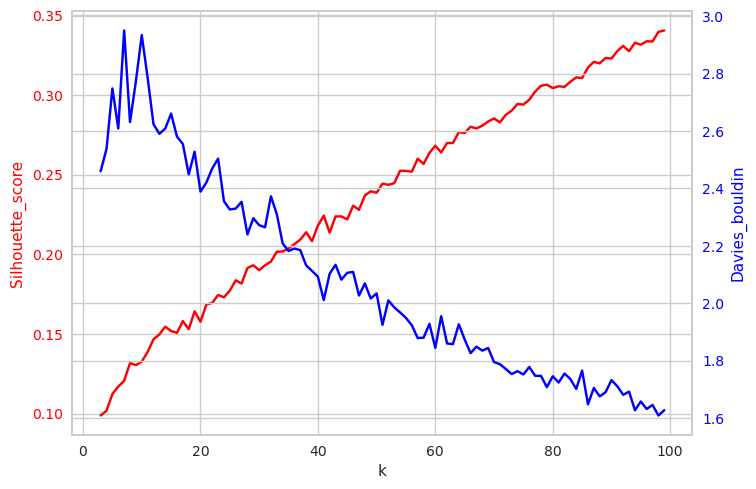

In [ ]:
plot_metrics(sil, davis_bouldin, param_name="k", param_range=param_range, silhouette_color="red", db_color="blue")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

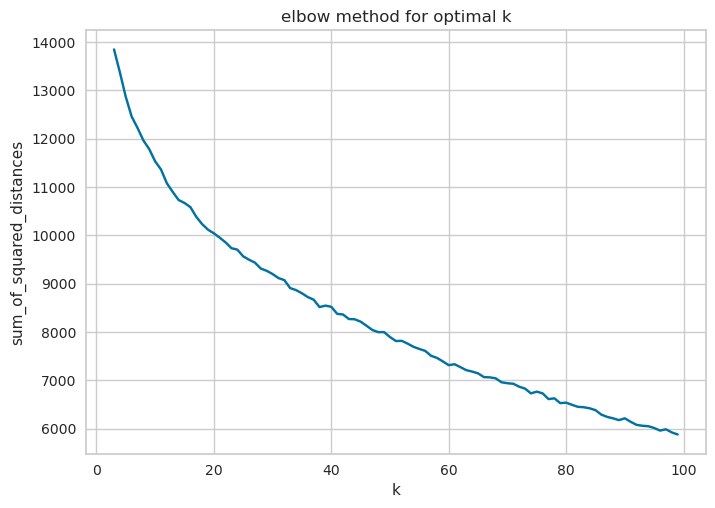

In [ ]:
# Plot inertia
plt.plot(param_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [ ]:
# Best clustering
#k = opt_val_sil
k = 59
kmeans = KMeans(n_clusters=k)
kmeans.fit(labels_encoded)

KMeans(n_clusters=59)

Graph des Silhouettes



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

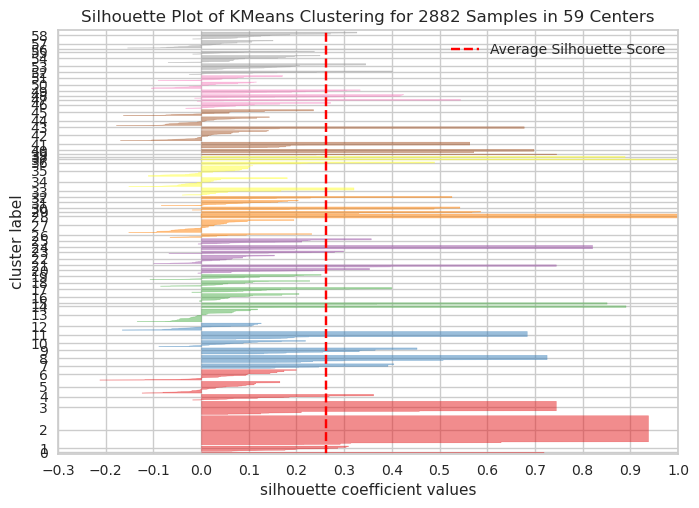

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2882 Samples in 59 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Graph des silhouettes
from yellowbrick.cluster import SilhouetteVisualizer
print("Graph des Silhouettes\n")
silhouette_vis = SilhouetteVisualizer(kmeans)
silhouette_vis.fit(labels_encoded)
silhouette_vis.poof()

In [ ]:
# Plot clusters
# Fit visualisation pipeline
import sklearn
from sklearn.manifold import TSNE
tsne = TSNE().fit_transform(labels_encoded)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

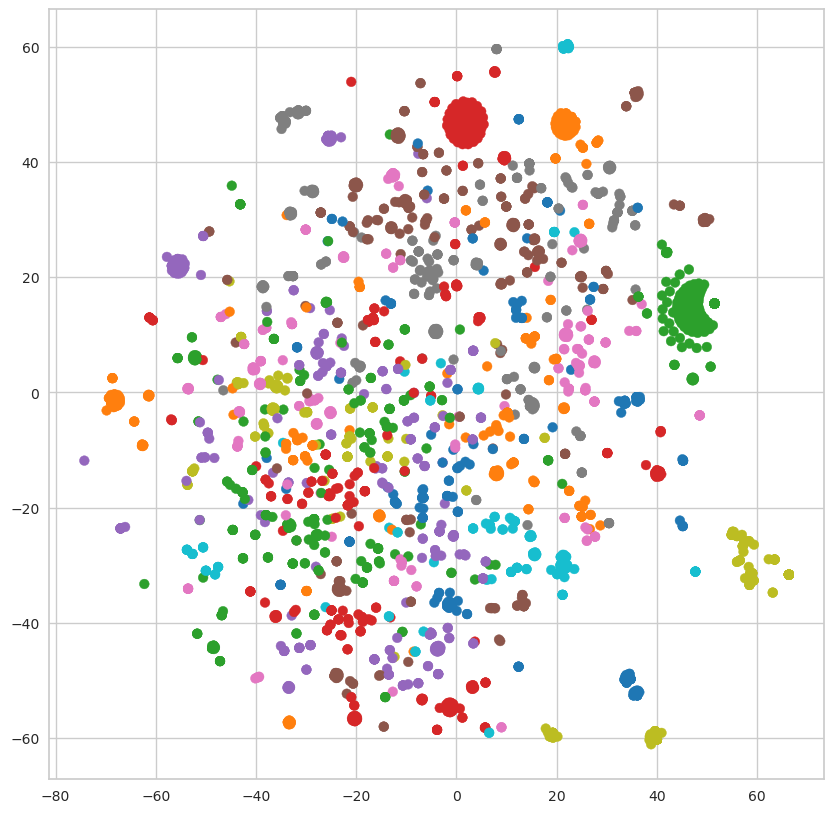

In [ ]:
# Plot TSNE
plt.figure(figsize=(10, 10))
axe = plt.axes()
clusters = kmeans.labels_
num_classes = k
palette = np.array(sns.color_palette("tab10", num_classes))
axe.scatter(x=tsne[:, 0], y=tsne[:, 1], c=palette[clusters.astype(int)])
plt.legend()